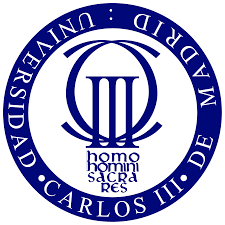

# PRÁCTICA 1: Procesamiento de datos mediante Apache Spark

Autores: Pablo Hidalgo Delgado, Till Niklas Kobele, Juan Romero Sanz, Juan María Villard Bardón.

NIAs: 100451225, 100548395, 100535977, 100439614.

Grupo de prácticas: D


## Índice
- [1. Introducción](#1.-Introducción)

- [2. Lectura de los datos](#2.-Lectura-de-los-datos)

    - [2.1 Trip data](#2.1-Trip-data)
 
    - [2.2 Zone data](#2.2-Zone-data)

- [3. Análisis exploratorio de los datos](#2.-Análisis-exploratorio-de-los-datos)
      
    - [3.1 Trip data](#3.1-Trip-data)
 
    - [3.2 Zone data](#3.2-Zone-data)



- [3. Preproceso de los datos](#3.-Preproceso-de-los-datos)


.

.

.


  
- [Conclusión](#conclusión)

## 1. Introducción

Este proyecto consiste en un análisis de los datos de viajes de taxis de YellowCab en la ciudad de Nueva York, utilizando Apache Spark para procesar grandes volúmenes de datos. Se realizan estudios sobre:

- Velocidad media de los taxis en función de la hora.
  
- Viajes en taxi más comunes.

- Registros financieros (propinas, recuento de pasajeros, etc.).
  
Esto se consigue mediante la implementación de consultas mediante Spark SQL, DataFrames y RDDs. El objetivo principal es realizar un análisis de rendimiento comparativo entre estas técnicas.


`revisar introducción`

## 2. Lectura de los datos

### 2.1 Trip data

En primer lugar, leemos el conjunto de datos principal, que se encontrará almacenado en el archivo data/tripdata_2017-01.csv. Este fichero contiene datos estructurados sobre los viajes en taxi en la ciudad de Nueva York durante el mes de Enero de 2017.

In [1]:
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf


spark = SparkSession.builder.master('local[3]').getOrCreate()
#spark.conf.set('spark.cores.max', '1')
#spark.conf.set('spark.driver.memory','1000M')

sc = spark.sparkContext

spark

In [2]:
# Definimos la ruta del archivo CSV
route_trip_data = "data/tripdata_2017-01.csv"

# Leemos el archivo CSV como un DataFrame de Spark
trip_data_df = spark.read.csv(route_trip_data, header=True, inferSchema=True)

print(type(trip_data_df))

<class 'pyspark.sql.dataframe.DataFrame'>


Se obtiene un objeto dataframe de Spark con los datos almacenados.

### 2.2 Zone data

De la misma manera, leemos el archivo csv que contiene información sobre las distintas zonas de la ciudad de Nueva York. Este archivo se incluye en la práctica con el objetivo de ampliar nuestro dataset principal, añadiendo información sobre las zonas en que se tomaron los taxis.

In [3]:
# Leemos el fichero con información sobre las zonas
route_zone_data = "data/taxi_zone_lookup.csv"

# Leemos el archivo CSV como un DataFrame de Spark
zone_data_df = spark.read.csv(route_zone_data, header=True, inferSchema=True)

## 3. Análisis exploratorio de los datos

Antes de empezar con las operaciones y el análisis, vamos a realizar un pequeño análisis exploratorio de datos (EDA). De esta manera, podremos investigar y resumir las características más importantes de nuestros datasets. Esto nos servirá para comprender mejor los conjuntos de datos.

### 3.1 Trip data

In [4]:
trip_data_df.toPandas()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2017-01-09 11:13:28,2017-01-09 11:25:45,1,3.30,1,N,263,161,1,12.5,0.0,0.5,2.00,0.00,0.3,15.30
1,1,2017-01-09 11:32:27,2017-01-09 11:36:01,1,0.90,1,N,186,234,1,5.0,0.0,0.5,1.45,0.00,0.3,7.25
2,1,2017-01-09 11:38:20,2017-01-09 11:42:05,1,1.10,1,N,164,161,1,5.5,0.0,0.5,1.00,0.00,0.3,7.30
3,1,2017-01-09 11:52:13,2017-01-09 11:57:36,1,1.10,1,N,236,75,1,6.0,0.0,0.5,1.70,0.00,0.3,8.50
4,2,2017-01-01 00:00:00,2017-01-01 00:00:00,1,0.02,2,N,249,234,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971005,2,2017-01-17 13:16:22,2017-01-17 13:35:14,1,3.43,1,N,264,264,2,14.5,0.0,0.5,0.00,0.00,0.3,15.30
971006,2,2017-01-17 13:16:23,2017-01-17 13:23:01,1,0.78,1,N,161,237,1,6.0,0.0,0.5,1.36,0.00,0.3,8.16
971007,2,2017-01-17 13:16:23,2017-01-17 13:23:51,1,0.95,1,N,237,229,2,6.5,0.0,0.5,0.00,0.00,0.3,7.30
971008,2,2017-01-17 13:16:23,2017-01-17 13:32:45,1,1.68,1,N,170,48,1,11.5,0.0,0.5,2.46,0.00,0.3,14.76


In [5]:
trip_data_df.printSchema()

root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: integer (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: integer (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)



El conjunto de datos se compone de **971010 filas y 17 atributos**. En cuanto a las columnas, 8 contienen valores de tipo double, 6 contienen valores enteros (integer), 2 contienen valores de tipo timestamp (fecha) y 1 contiene valores de tipo string. Inspeccionando la página web [NYC TLC Trip Record Data](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page), podemos encontrar el significado de todos estos atributos.

In [6]:
trip_data_df.describe().toPandas()

,summary,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,count,971010,971010,971010,971010,971010,971010,971010,971010,971010,971010,971010,971010,971010,971010,971010
1,mean,1.5569510097733288,1.6859888157691476,3.0312848786315656,1.0447286845655555,None,160.37803112223355,158.5567120832947,1.3719735121162502,13.108188154601871,0.20999277041431086,0.4972142408420099,1.679028269533885,0.2801808838219444,0.29962863410438667,16.07811082269887
2,stddev,0.4967462497187963,1.291704683757403,3.7858472332116673,0.4616312653743044,None,67.93819834229264,72.27682104933919,0.5033263270235208,546.7369331190969,0.26163400368201517,0.04058594644609186,2.5713641104199683,1.7369077136569482,0.014468410899185467,546.790102265859
3,min,1,0,0.0,1,N,1,1,1,-120.0,-1.0,-0.5,-6.06,0.0,-0.3,-120.3
4,max,2,9,151.7,99,Y,265,265,4,538579.2,55.54,0.5,366.0,905.54,0.3,538580.0


### 3.2 Zone data

In [7]:
zone_data_df.toPandas()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,N/A,N/A


In [8]:
zone_data_df.printSchema()

root
 |-- LocationID: integer (nullable = true)
 |-- Borough: string (nullable = true)
 |-- Zone: string (nullable = true)
 |-- service_zone: string (nullable = true)



El conjunto de datos se compone de **265 filas y 4 atributos**. Cada fila se corresponde con una zona distinta de Nueva York, identificada por la columna `LocationID`

In [9]:
zone_data_df.describe().toPandas()

,summary,LocationID,Borough,Zone,service_zone
0,count,265,265,265,265
1,mean,133.0,None,None,None
2,stddev,76.643112323722,None,None,None
3,min,1,Bronx,Allerton/Pelham Gardens,Airports
4,max,265,Unknown,Yorkville West,Yellow Zone


## 3. Preproceso de los datos

Antes de empezar con las distintas operaciones, realizamos un pequeño preproceso de los datos para tenerlos en el formato más adecuado y objetivo para la realización de la práctica.

### 3.1 Conversión de formato de fecha al formato UNIX (timestamp)

En el apartado anterior, observamos que las columnas **tpep_pickup_datetime** y **tpep_dropoff_datetime** contienen fechas (como era de esperar) en formato cadena (string) con el formato aaaa-mm-dd hh:mm:ss. 

Para poder trabajar y realizar operaciones matemáticas con estos valores de fechas, es necesario convertirlas a un formato que permita cálculos y comparaciones eficientes, como el formato UNIX (timestamp), el cual representa el número de segundos transcurridos desde el 1 de enero de 1970.

In [10]:
# CÓDIGO

### 3.2 Unión de las 2 fuentes de datos

Para ampliar nuestro conjunto de datos y agregar información adicional, vamos a incorporar detalles sobre las zonas de Nueva York en las que inició y finalizó cada viaje de taxi. Para ello, realizamos dos uniones (joins) entre nuestro conjunto de datos de viajes y el conjunto de datos de zonas, utilizando el atributo LocationID del dataset de zonas y los atributos PULocationID (zona de inicio del viaje o donde se activó el taxímetro) y DOLocationID (zona de finalización del viaje o donde se apagó el taxímetro) del dataset de viajes.

In [21]:
from pyspark.sql import functions as F

# Hacemos el join por la el ID de Localización en que se inició el trayecto y seleccionamos las columnas con los nombres necesarios
trip_data_df_joined = (
    trip_data_df.alias("trip_data")
    .join(zone_data_df.alias("pickup_zone"), F.col("trip_data.PULocationID") == F.col("pickup_zone.LocationID"), "inner")
    .join(zone_data_df.alias("dropoff_zone"), F.col("trip_data.DOLocationID") == F.col("dropoff_zone.LocationID"), "inner")
    .select(
        "trip_data.*",  # Todas las columnas originales de trip_data
        F.col("pickup_zone.service_zone").alias("Pickup_service_zone"),  # Seleccionamos y renombramos las columnas de pickup_zone
        F.col("pickup_zone.Borough").alias("Pickup_Borough"),
        F.col("pickup_zone.Zone").alias("Pickup_Zone"),
        F.col("dropoff_zone.service_zone").alias("Dropoff_service_zone"),  # Seleccionamos y renombramos las columnas de dropff_zone
        F.col("dropoff_zone.Borough").alias("Dropoff_Borough"),
        F.col("dropoff_zone.Zone").alias("Dropoff_Zone")
    )
)

trip_data_df_joined.printSchema()


root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: integer (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: integer (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- Pickup_service_zone: string (nullable = true)
 |-- Pickup_Borough: string (nullable = true)
 |-- Pickup_Zone: string (nullable = true)
 |-- Dropoff_service_zone: string (nullable = true)
 |-- Dropoff_Borough: string